In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import os
import calendar

In [41]:
csv_path = Path("seattle-neighborhoods.csv")
df = pd.read_csv(csv_path)

In [42]:
df.head()
df = df.fillna(method="pad")
df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Seattle, WA",February 2012,$320K,6.7%,-5.9%,495,11.7%,14.6%,779,21.3%,-11.5%,"1,928",-4.8%,-33.9%,62.0,2.0,-12.0,97.2%,0.3%,0.8%
1,"Seattle, WA",March 2012,$350K,9.4%,0.0%,670,35.4%,0.8%,998,28.1%,-5.9%,"1,930",0.1%,-34.7%,40.0,-22.0,-26.0,98.1%,0.9%,1.3%
2,"Seattle, WA",April 2012,$379K,8.3%,7.2%,778,16.1%,14.1%,"1,037",3.9%,-7.9%,"1,944",0.7%,-36.9%,30.0,-10.0,-13.0,98.5%,0.4%,1.2%
3,"Seattle, WA",May 2012,$380K,0.3%,9.4%,890,14.4%,28.6%,"1,077",3.9%,4.9%,"1,952",0.4%,-36.7%,19.0,-11.0,-15.0,99.2%,0.7%,1.9%
4,"Seattle, WA",June 2012,$380K,0.0%,8.1%,927,4.2%,13.6%,"1,014",-5.8%,-6.2%,"1,969",0.9%,-38.4%,17.0,-2.0,-20.0,99.3%,0.1%,2.0%


In [43]:
seattle_df = df.drop(df[df["Region"] != "Seattle, WA"].index)
seattle_df["Region"] = seattle_df["Region"].str.replace("Seattle, WA", "Seattle")
seattle_df.set_index("Region", inplace=True)
seattle_df.dtypes

Month of Period End           object
Median Sale Price             object
Median Sale Price MoM         object
Median Sale Price YoY         object
Homes Sold                    object
Homes Sold MoM                object
Homes Sold YoY                object
New Listings                  object
New Listings MoM              object
New Listings YoY              object
Inventory                     object
Inventory MoM                 object
 Inventory YoY                object
Days on Market               float64
Days on Market MoM           float64
Days on Market YoY           float64
Average Sale To List          object
Average Sale To List MoM      object
Average Sale To List YoY      object
dtype: object

In [44]:
neighborhood_df = df.drop(df[df["Region"] == "Seattle, WA"].index)
neighborhood_df.head()
neighborhood_df["Region"] = neighborhood_df["Region"].str.split("-")
#neighborhood_df["Month of Period End"] = neighborhood_df["Month of Period End"].str.split(" ")


neighborhood_df["Region"] = neighborhood_df["Region"].str[1]
#neighborhood_df["Year"]= neighborhood_df["Month of Period End"].str[1]
#neighborhood_df["Month of Period End"] = neighborhood_df["Month of Period End"].str[0]

#name_to_num = {name: num for num, name in enumerate(calendar.month_name) if num}
#name_to_num
#neighborhood_df["Month of Period End"] = neighborhood_df["Month of Period End"].apply(lambda x: name_to_num[x])


neighborhood_df.set_index("Region", inplace=True)

pd.to_datetime(neighborhood_df["Month of Period End"])

neighborhood_df.head()

,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Region,,,,,,,,,,,,,,,,,,,
Adams,February 2012,$348K,-0.7%,3.7%,40,-7.0%,25.0%,28,-15.2%,-37.8%,30,-3.2%,-37.5%,40.0,-10.0,-17.0,98.6%,0.2%,1.0%
Adams,March 2012,$347K,-0.1%,4.4%,40,0.0%,11.1%,43,53.6%,-33.8%,25,-16.7%,-50.0%,49.0,10.0,-6.0,98.6%,-0.1%,0.3%
Adams,April 2012,$325K,-6.3%,-6.7%,47,17.5%,6.8%,65,51.2%,20.4%,37,48.0%,-22.9%,46.0,-4.0,27.0,98.7%,0.2%,0.1%
Adams,May 2012,$332K,2.0%,-8.4%,56,19.1%,21.7%,71,9.2%,26.8%,32,-13.5%,-37.3%,37.0,-9.0,8.0,99.2%,0.4%,0.7%
Adams,June 2012,$328K,-1.1%,-2.2%,63,12.5%,61.5%,68,-4.2%,41.7%,25,-21.9%,-50.0%,16.0,-21.0,-23.0,99.0%,-0.2%,-0.6%


In [45]:
#neighborhood_df.replace({"Median Sale Price": {'$': ''}}, regex=True)

neighborhood_df["Median Sale Price"] = neighborhood_df["Median Sale Price"].str.replace("$", "")
dictionary = {'%':'', 'K':'', '$' : '', ',' : ''} 
neighborhood_df.replace(dictionary, regex=True, inplace=True)
neighborhood_df.head()

,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Region,,,,,,,,,,,,,,,,,,,
Adams,February 2012,348,-0.7,3.7,40,-7.0,25.0,28,-15.2,-37.8,30,-3.2,-37.5,40.0,-10.0,-17.0,98.6,0.2,1.0
Adams,March 2012,347,-0.1,4.4,40,0.0,11.1,43,53.6,-33.8,25,-16.7,-50.0,49.0,10.0,-6.0,98.6,-0.1,0.3
Adams,April 2012,325,-6.3,-6.7,47,17.5,6.8,65,51.2,20.4,37,48.0,-22.9,46.0,-4.0,27.0,98.7,0.2,0.1
Adams,May 2012,332,2.0,-8.4,56,19.1,21.7,71,9.2,26.8,32,-13.5,-37.3,37.0,-9.0,8.0,99.2,0.4,0.7
Adams,June 2012,328,-1.1,-2.2,63,12.5,61.5,68,-4.2,41.7,25,-21.9,-50.0,16.0,-21.0,-23.0,99.0,-0.2,-0.6


In [46]:
seattle_df["Median Sale Price"] = seattle_df["Median Sale Price"].str.replace("$", "")
seattle_df.replace(dictionary, regex=True, inplace=True)
seattle_df.head()

,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Region,,,,,,,,,,,,,,,,,,,
Seattle,February 2012,320,6.7,-5.9,495,11.7,14.6,779,21.3,-11.5,1928,-4.8,-33.9,62.0,2.0,-12.0,97.2,0.3,0.8
Seattle,March 2012,350,9.4,0.0,670,35.4,0.8,998,28.1,-5.9,1930,0.1,-34.7,40.0,-22.0,-26.0,98.1,0.9,1.3
Seattle,April 2012,379,8.3,7.2,778,16.1,14.1,1037,3.9,-7.9,1944,0.7,-36.9,30.0,-10.0,-13.0,98.5,0.4,1.2
Seattle,May 2012,380,0.3,9.4,890,14.4,28.6,1077,3.9,4.9,1952,0.4,-36.7,19.0,-11.0,-15.0,99.2,0.7,1.9
Seattle,June 2012,380,0.0,8.1,927,4.2,13.6,1014,-5.8,-6.2,1969,0.9,-38.4,17.0,-2.0,-20.0,99.3,0.1,2.0


In [47]:
neighborhood_df[['Median Sale Price',
 'Median Sale Price MoM ',
 'Median Sale Price YoY ',
 'Homes Sold',
 'Homes Sold MoM ',
 'Homes Sold YoY ',
 'New Listings',
 'New Listings MoM ',
 'New Listings YoY ',
 'Inventory',
 'Inventory MoM ',
 ' Inventory YoY ',
 'Days on Market',
 'Days on Market MoM',
 'Days on Market YoY',
 'Average Sale To List',
 'Average Sale To List MoM ',
 'Average Sale To List YoY ']] = neighborhood_df[['Median Sale Price',
 'Median Sale Price MoM ',
 'Median Sale Price YoY ',
 'Homes Sold',
 'Homes Sold MoM ',
 'Homes Sold YoY ',
 'New Listings',
 'New Listings MoM ',
 'New Listings YoY ',
 'Inventory',
 'Inventory MoM ',
 ' Inventory YoY ',
 'Days on Market',
 'Days on Market MoM',
 'Days on Market YoY',
 'Average Sale To List',
 'Average Sale To List MoM ',
 'Average Sale To List YoY ']].apply(pd.to_numeric)

In [48]:
neighborhood_df.columns = ['Month_of_Period_End','Median_Sale_Price',
 'Median_Sale_Price_MoM ',
 'Median_Sale_Price_YoY ',
 'Homes_Sold',
 'Homes_Sold_MoM ',
 'Homes_Sold_YoY ',
 'New_Listings',
 'New_Listings_MoM ',
 'New_Listings_YoY ',
 'Inventory',
 'Inventory_MoM ',
 ' Inventory_YoY ',
 'Days_on_Market',
 'Days_on_Market_MoM',
 'Days_on_Market_YoY',
 'Average_Sale_To_List',
 'Average_Sale_To_List_MoM ',
 'Average_Sale_To_List_YoY ']

In [49]:
neighborhood_df.dtypes

Month_of_Period_End           object
Median_Sale_Price              int64
Median_Sale_Price_MoM        float64
Median_Sale_Price_YoY        float64
Homes_Sold                     int64
Homes_Sold_MoM               float64
Homes_Sold_YoY               float64
New_Listings                   int64
New_Listings_MoM             float64
New_Listings_YoY             float64
Inventory                      int64
Inventory_MoM                float64
 Inventory_YoY               float64
Days_on_Market               float64
Days_on_Market_MoM           float64
Days_on_Market_YoY           float64
Average_Sale_To_List         float64
Average_Sale_To_List_MoM     float64
Average_Sale_To_List_YoY     float64
dtype: object

In [50]:
std_df = pd.DataFrame(neighborhood_df["Median_Sale_Price"])

std_df = std_df.groupby('Region').std()

std_df.sort_values(by=['Median_Sale_Price'], inplace = True)

std_df.head()

,Median_Sale_Price
Region,
Belltown,94.360550
Broadway,107.913857
International District,109.137672
Pinehurst,110.124877
Dunlap,110.136002


In [51]:
belltown_df = neighborhood_df.loc[neighborhood_df.index == " Belltown"]
#belltown_df = neighborhood_df.get_group(" Belltown")
#df_A=df.loc[df['Region']==A]

#neighborhood_df.index.unique()

belltown_df.head()


,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Belltown,February 2012,357,-6.6,-1.5,42,-22.2,-6.7,53,8.2,-11.7,61,-1.6,-37.8,45.0,24.0,-41.0,96.6,-0.3,0.5
Belltown,March 2012,350,-1.8,4.5,43,2.4,-10.4,77,45.3,-11.5,59,-3.3,-47.3,65.0,21.0,-4.0,96.7,0.0,0.8
Belltown,April 2012,358,2.3,17.0,65,51.2,22.6,103,33.8,5.1,69,16.9,-40.0,53.0,-13.0,-67.0,97.9,1.2,2.5
Belltown,May 2012,423,18.1,51.0,81,24.6,47.3,113,9.7,1.8,72,4.3,-35.7,39.0,-14.0,-46.0,98.0,0.1,2.8
Belltown,June 2012,419,-0.8,51.4,98,21.0,53.1,111,-1.8,-0.9,65,-9.7,-43.0,36.0,-3.0,-17.0,98.2,0.2,2.1


In [52]:
belltown_df['Month_of_Period_End'] = pd.to_datetime(belltown_df['Month_of_Period_End'], infer_datetime_format=True)


<AxesSubplot:xlabel='Month_of_Period_End'>

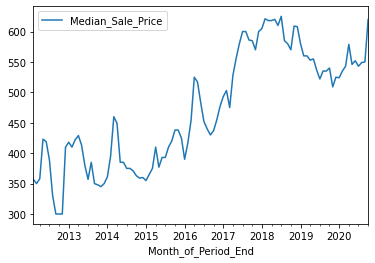

In [53]:
#belltown_df["Median Sale Price","Year"].plot()

belltown_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [54]:
from statsmodels.tsa.stattools import adfuller
adfuller(belltown_df.Median_Sale_Price)

(-0.7513717688393359,
 0.8329907730802779,
 3,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 833.365488387235)

In [55]:
belltown_df['Returns'] = belltown_df.Median_Sale_Price.pct_change()
belltown_df = belltown_df.dropna()

In [56]:
train = belltown_df.iloc[:94,:] 
test = belltown_df.iloc[95:,:]

Comparison = pd.DataFrame()
#Comparison.index = test.index
Comparison["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison

,Original
Region,
Belltown,0.020992
Belltown,0.014953
Belltown,0.066298
Belltown,-0.056995
Belltown,0.010989
Belltown,-0.016304
Belltown,0.011050
Belltown,0.001821
Belltown,0.127273


In [57]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                 122.306
Method:                       css-mle   S.D. of innovations              0.066
Date:                Sat, 05 Dec 2020   AIC                           -236.611
Time:                        11:03:10   BIC                           -226.438
Sample:                             0   HQIC                          -232.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.008      0.788      0.431      -0.009       0.022
ar.L1.y        0.0027      0.360      0.007      0.994      -0.702       0.708
ma.L1.y        0.1585      0.345      0.459      0.646      -0.518       0.835
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          371.8089           +0.0000j          371.8089            0.0000
MA.1           -6.3098           +0.0000j            6.3098            0.5000
-----------------------------------------------------------------------------
"""

In [58]:
predicted_arma = results.forecast(steps=9)[0]
Comparison["Arma"] = predicted_arma
Comparison

,Original,Arma
Region,,
Belltown,0.020992,0.011920
Belltown,0.014953,0.006226
Belltown,0.066298,0.006211
Belltown,-0.056995,0.006211
Belltown,0.010989,0.006211
Belltown,-0.016304,0.006211
Belltown,0.011050,0.006211
Belltown,0.001821,0.006211
Belltown,0.127273,0.006211


In [35]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\siege\.conda\envs\UWFinTech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\siege\.conda\envs\UWFinTech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 118.367
Method:                       css-mle   S.D. of innovations              0.066
Date:                Sat, 05 Dec 2020   AIC                           -228.734
Time:                        10:58:03   BIC                           -218.603
Sample:                             1   HQIC                          -224.643
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0001      0.000     -0.373      0.709      -0.001       0.000
ar.L1.D.Returns     0.1615      0.103      1.569      0.117      -0.040       0.363
ma.L1.D.Returns    -1.0000      0.028    -35.159      0.000      -1.056      -0.944
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.1910           +0.0000j            6.1910            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
predicted_arima = results.forecast(steps=9)[0]
Comparison["Arima"] = predicted_arma
Comparison

,Original,Arma,Arima
Region,,,
Belltown,0.020992,0.011920,0.011920
Belltown,0.014953,0.006226,0.006226
Belltown,0.066298,0.006211,0.006211
Belltown,-0.056995,0.006211,0.006211
Belltown,0.010989,0.006211,0.006211
Belltown,-0.016304,0.006211,0.006211
Belltown,0.011050,0.006211,0.006211
Belltown,0.001821,0.006211,0.006211
Belltown,0.127273,0.006211,0.006211


In [37]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                130.361
Distribution:                  Normal   AIC:                          -254.722
Method:            Maximum Likelihood   BIC:                          -247.092
                                        No. Observations:                   94
Date:                Sat, Dec 05 2020   Df Residuals:                       91
Time:                        10:58:04   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.9813e-05  2.083e-04      0.431      0.666 [-3.185e-04,4.982e-04]
alpha[1]       0.1000  4.951e-02      2.020  4.340e-02    [2.963e-03,  0.197]
beta[1]        0.8800  4.973e-02     17.697  4.399e-70      [  0.783,  0.977]
=============================================================================

Covariance estimator: robust
"""

In [38]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison.index
Comparison["Garch"] = final["Garch"]

In [39]:
Comparison

,Original,Arma,Arima,Garch
Region,,,,
Belltown,0.020992,0.011920,0.011920,0.636742
Belltown,0.014953,0.006226,0.006226,0.648047
Belltown,0.066298,0.006211,0.006211,0.658937
Belltown,-0.056995,0.006211,0.006211,0.669438
Belltown,0.010989,0.006211,0.006211,0.679571
Belltown,-0.016304,0.006211,0.006211,0.689357
Belltown,0.011050,0.006211,0.006211,0.698815
Belltown,0.001821,0.006211,0.006211,0.707960
Belltown,0.127273,0.006211,0.006211,0.716810
